In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BOS211.csv', sep =';', low_memory = False)

In [3]:
df['05'].value_counts()

#    128651
Z     40303
Name: 05, dtype: int64

In [4]:
df['05'].isnull().sum()

695046

In [5]:
df.columns

Index(['time', '05', '06', '07', '09', '10', '11', '24', '26', '28', '35',
       '36', '37', '38', '95', '051', '052', '053', '054', '055', '056', '057',
       '058', '061', '062', '063', '064', '071', '072', '073', '074', '091',
       '092', '093', '094', '101', '102', '103', '104', '111', '112', '113',
       '114', '115', '116', '117', '118', '241', 'K24', '261', 'K26', '281',
       '282', '283', 'K28', 'K351', 'K352951', 'K361', 'K362', 'K358', 'K369',
       'K371', 'K372', 'K381', 'K382', 'K378', 'K389', 'K952', 'F059', 'F119',
       'F0510', 'F1110'],
      dtype='object')

In [6]:
df['09'].value_counts()
        

#    116072
Z     27142
Name: 09, dtype: int64

In [7]:
df

,time,05,06,07,09,10,11,24,26,28,...,K372,K381,K382,K378,K389,K952,F059,F119,F0510,F1110
0,02-11-2020 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,|,|,|,|,NaN
1,02-11-2020 00:00:00.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,|,|,|,|,NaN
2,02-11-2020 00:00:00.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,|,|,|,|,NaN
3,02-11-2020 00:00:00.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,|,|,|,|,NaN
4,02-11-2020 00:00:00.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,|,|,|,|,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863995,02-11-2020 23:59:59.5,NaN,NaN,NaN,NaN,#,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,|,|,|,|,NaN
863996,02-11-2020 23:59:59.6,NaN,NaN,NaN,NaN,#,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,|,|,|,|,NaN
863997,02-11-2020 23:59:59.7,NaN,NaN,NaN,NaN,#,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,|,|,|,|,NaN
863998,02-11-2020 23:59:59.8,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,|,|,|,|,NaN


In [8]:
df['F119'].value_counts()

|    864000
Name: F119, dtype: int64

In [9]:
df2 = pd.read_csv('BOS211-7919015E-VT450903_2021-12-13_2021-12-13_SIGNAL_GROUP-unfiltered.csv', sep = ';')

In [10]:
df2

,TLC_ID,TLC_NAME,SG_ID,SG_NAME,TIMESTAMP,DATA_AVAILABILITY,CYCLES_ALL_CYCLES_COUNT,CYCLES_ONLY_WAITING_COUNT,CYCLES_SATURATED_COUNT,CYCLE_TIME_COUNT,...,RED_TOTAL,WAIT_SCORE_ALL_CYCLES_COUNT,WAIT_SCORE_ALL_CYCLES_MAX,WAIT_SCORE_ALL_CYCLES_SUM,WAIT_TIME_ALL_CYCLES_COUNT,WAIT_TIME_ALL_CYCLES_MAX,WAIT_TIME_ALL_CYCLES_SUM,WAIT_TIME_ONLY_WAITING_COUNT,WAIT_TIME_ONLY_WAITING_MAX,WAIT_TIME_ONLY_WAITING_SUM
0,7919015E,BOS211-7919015E-VT450903,1,5,2021-12-13 00:00,100,10,0,0,10,...,1,,,,6,14,45,0,0,0
1,7919015E,BOS211-7919015E-VT450903,1,5,2021-12-13 00:15,100,4,0,0,4,...,0,,,,0,0,0,0,0,0
2,7919015E,BOS211-7919015E-VT450903,1,5,2021-12-13 00:30,100,8,0,0,8,...,1,,,,6,15,47,0,0,0
3,7919015E,BOS211-7919015E-VT450903,1,5,2021-12-13 00:45,100,6,0,0,6,...,0,,,,3,7,15,0,0,0
4,7919015E,BOS211-7919015E-VT450903,1,5,2021-12-13 01:00,100,2,0,0,2,...,0,,,,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,7919015E,BOS211-7919015E-VT450903,14,95,2021-12-13 22:45,100,,,,0,...,,,,,,,,,,
1340,7919015E,BOS211-7919015E-VT450903,14,95,2021-12-13 23:00,100,,,,0,...,,,,,,,,,,
1341,7919015E,BOS211-7919015E-VT450903,14,95,2021-12-13 23:15,100,,,,0,...,,,,,,,,,,
1342,7919015E,BOS211-7919015E-VT450903,14,95,2021-12-13 23:30,100,,,,0,...,,,,,,,,,,


In [11]:
df3 = pd.read_csv('BOS211-7919015E-VT450903_2021-12-13_2021-12-13_SIGNAL_GROUP-filtered.csv', sep = ';')

In [12]:
df2.head()

,TLC_ID,TLC_NAME,SG_ID,SG_NAME,TIMESTAMP,DATA_AVAILABILITY,CYCLES_ALL_CYCLES_COUNT,CYCLES_ONLY_WAITING_COUNT,CYCLES_SATURATED_COUNT,CYCLE_TIME_COUNT,...,RED_TOTAL,WAIT_SCORE_ALL_CYCLES_COUNT,WAIT_SCORE_ALL_CYCLES_MAX,WAIT_SCORE_ALL_CYCLES_SUM,WAIT_TIME_ALL_CYCLES_COUNT,WAIT_TIME_ALL_CYCLES_MAX,WAIT_TIME_ALL_CYCLES_SUM,WAIT_TIME_ONLY_WAITING_COUNT,WAIT_TIME_ONLY_WAITING_MAX,WAIT_TIME_ONLY_WAITING_SUM
0,7919015E,BOS211-7919015E-VT450903,1,5,2021-12-13 00:00,100,10,0,0,10,...,1,,,,6,14,45,0,0,0
1,7919015E,BOS211-7919015E-VT450903,1,5,2021-12-13 00:15,100,4,0,0,4,...,0,,,,0,0,0,0,0,0
2,7919015E,BOS211-7919015E-VT450903,1,5,2021-12-13 00:30,100,8,0,0,8,...,1,,,,6,15,47,0,0,0
3,7919015E,BOS211-7919015E-VT450903,1,5,2021-12-13 00:45,100,6,0,0,6,...,0,,,,3,7,15,0,0,0
4,7919015E,BOS211-7919015E-VT450903,1,5,2021-12-13 01:00,100,2,0,0,2,...,0,,,,0,0,0,0,0,0


In [13]:
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt

def xml_to_dict(filename):
    with open(filename) as t:
        data = t.read()
        xmldict = xmltodict.parse(data)
    return xmldict

def lanedata_extract(filename):
    #import xml as dict
    xmldict = xml_to_dict(filename)

    #access the lanesets in the dict
    lanesets = xmldict['topology']['mapData']['intersections']['intersectionGeometry']['laneSet']['genericLane']

    #extract lane data
    lanedata = []
    for lane in lanesets: #for every lane in lanesets
        for node in lane['nodes']['nodeXY']: #for every node in lane
            lat, long = node['node-LatLon']['lat'], node['node-LatLon']['lon'] #extract lat and long
            lanedata.append((float(lat) / 10000000, float(long) / 10000000)) #divide so we get the correct values
    
    lanedf = pd.DataFrame(lanedata)#convert collected data to a dataframe
    lanedf.columns = ['lat', 'long'] #set column names
    
    return lanedf

def inductionloop_extract(filename):
    #import xml as dict
    xmldict = xml_to_dict(filename)
    
    #access the sensorsets in the dict
    sensorsets = xmldict['topology']['controlData']['controller']['controlUnits']['controlUnit']['controlledIntersections']['controlledIntersection']['sensors']['sensor']
    
    #extract the loop info
    loop_data = []
    for sensor in sensorsets:
        sensor_type = sensor['sensorDeviceType']
        if sensor_type == 'inductionLoop': #only extract data if its an inductionLoop
            lat, long = sensor['sensorPosition']['lat'], sensor['sensorPosition']['long']
            loop_data.append((float(lat) / 10000000, float(long) / 10000000))

    sensordf = pd.DataFrame(loop_data)
    sensordf.columns = ['lat', 'long']

    return sensordf

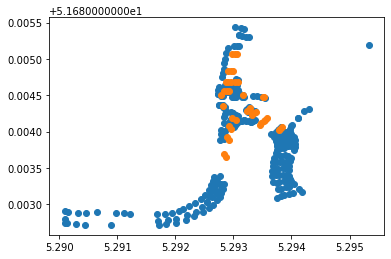

In [14]:
def plotmappie(filename):
    #get both loops and lanes
    loops = inductionloop_extract(filename)
    lanes = lanedata_extract(filename)
    
    #plot the points
    plt.scatter(x=lanes['long'], y=lanes['lat'])
    plt.scatter(x=loops['long'], y=loops['lat'])
    plt.show()

plotmappie("7919015E_BOS211_ITF_COMPLETE.xml")

In [15]:
lanedf = lanedata_extract('7919015E_BOS211_ITF_COMPLETE.xml')
lat = lanedf.lat
long = lanedf.long

In [16]:
import matplotlib.pyplot as plt

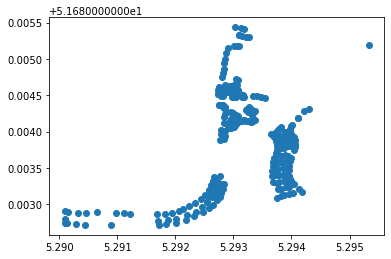

In [17]:
plt.scatter(long,lat)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
import numpy as np

In [19]:
def scale_lat_long(lat,long, grid_size = 100):

    scaler = MinMaxScaler()
    scaled_lat = list([int(abs(round(float(x),len(str(grid_size))-1) * grid_size)) for x in scaler.fit_transform(np.array(lat).reshape(-1,1))])
    scaled_long = list([int(abs(round(float(x),len(str(grid_size))-1) * grid_size)) for x in scaler.fit_transform(np.array(long).reshape(-1,1))])
    
    return list(set(zip(scaled_long,scaled_lat)))

In [20]:
dat = scale_lat_long(lat,long)

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=6, random_state=0).fit_predict(dat)

In [23]:
test = inductionloop_extract('7919015E_BOS211_ITF_COMPLETE.xml')
x = test.long
y = test.lat

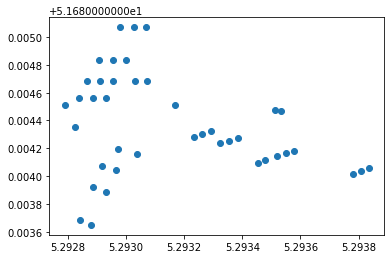

In [24]:
plt.scatter(x,y)

In [25]:
kmeans = KMeans(n_clusters=15, random_state=0).fit_predict(list(zip(x,y)))

In [26]:
kmeans

array([ 5,  5,  5,  5,  2,  2,  7,  7,  5,  5,  2,  7, 12,  4, 10,  0, 12,
        4, 10,  0,  1, 14,  3,  6,  1,  1, 14, 14,  3,  3,  6,  6,  1, 11,
       13,  9,  9,  8,  2,  8,  2])

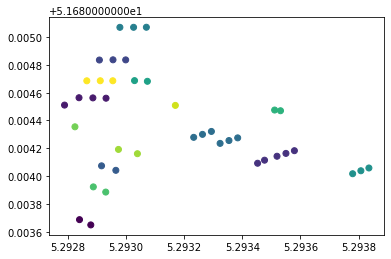

In [27]:
plt.scatter(x,y, c = kmeans)

In [28]:
xmldict = xml_to_dict('7919015E_BOS211_ITF_COMPLETE.xml')
    
sensorsets = xmldict['topology']['controlData']['controller']['controlUnits']['controlUnit']['controlledIntersections']['controlledIntersection']['sensors']['sensor']



In [29]:
for x in sensorsets:
    print(x)
    print()

OrderedDict([('sensorID', '1'), ('name', '051'), ('sensorDeviceType', 'inductionLoop'), ('sensorOutput', '010000'), ('vlogIdx', '0'), ('sensorPosition', OrderedDict([('lat', '516843212'), ('long', '52932936')])), ('length', '100'), ('geoShape', OrderedDict([('indexPoint', [OrderedDict([('index', '0'), ('lat', '516843341'), ('long', '52932927')]), OrderedDict([('index', '1'), ('lat', '516843280'), ('long', '52933033')]), OrderedDict([('index', '2'), ('lat', '516843082'), ('long', '52932945')]), OrderedDict([('index', '3'), ('lat', '516843143'), ('long', '52932839')]), OrderedDict([('index', '4'), ('lat', '516843341'), ('long', '52932927')])])])), ('sensorAllocations', OrderedDict([('sensorAllocation', OrderedDict([('laneID', '13'), ('distance', '100')]))])), ('sensorRelations', OrderedDict([('sensorRelation', [OrderedDict([('laneID', '13'), ('purpose', 'gapMeasure')]), OrderedDict([('laneID', '13'), ('purpose', 'measure')])])]))])

OrderedDict([('sensorID', '2'), ('name', '052'), ('sens

In [30]:
sensor_dict = {x['name']: {'laneID' : x['sensorAllocations']['sensorAllocation']['laneID'], 'lat':x['sensorPosition']['lat'], 'long':x['sensorPosition']['long'], 'length': x['length'], 'distance': x['sensorAllocations']['sensorAllocation']['distance']} for x in sensorsets if x['sensorDeviceType'] == 'inductionLoop' }

In [31]:
pd.DataFrame([x['laneID'] for x in sensor_dict.values()]).value_counts()

1     4
13    4
14    4
15    4
2     4
3     4
7     4
8     4
4     3
16    1
17    1
18    1
20    1
21    1
9     1
dtype: int64

In [129]:
sensor_dict

{'051': {'laneID': '13',
  'lat': '516843212',
  'long': '52932936',
  'length': '100',
  'distance': '100',
  'sharedWith': '0001000000'},
 '052': {'laneID': '14',
  'lat': '516843002',
  'long': '52932629',
  'length': '100',
  'distance': '100',
  'sharedWith': '0001000000'},
 '053': {'laneID': '13',
  'lat': '516842750',
  'long': '52933840',
  'length': '800',
  'distance': '600',
  'sharedWith': '0001000000'},
 '054': {'laneID': '14',
  'lat': '516842557',
  'long': '52933540',
  'length': '800',
  'distance': '600',
  'sharedWith': '0001000000'},
 '055': {'laneID': '13',
  'lat': '516841828',
  'long': '52935791',
  'length': '1800',
  'distance': '1800',
  'sharedWith': '0001000000'},
 '056': {'laneID': '14',
  'lat': '516841633',
  'long': '52935500',
  'length': '1800',
  'distance': '1800',
  'sharedWith': '0001000000'},
 '057': {'laneID': '13',
  'lat': '516840584',
  'long': '52938354',
  'length': '100',
  'distance': '4900',
  'sharedWith': '0001000000'},
 '058': {'laneI

In [32]:
laneattributes = xmldict['topology']['mapData']['intersections']['intersectionGeometry']['laneSet']['genericLane']

In [154]:
laneattributes

[OrderedDict([('laneID', '1'),
              ('name', '10-1'),
              ('ingressApproach', '1'),
              ('laneAttributes',
               OrderedDict([('directionalUse', '10'),
                            ('sharedWith', '0001000000'),
                            ('vehicle', '00000000')])),
              ('nodes',
               OrderedDict([('nodeXY',
                             [OrderedDict([('node-LatLon',
                                            OrderedDict([('lat', '516845425'),
                                                         ('lon',
                                                          '52928407')])),
                                           ('attributes',
                                            OrderedDict([('localNode',
                                                          OrderedDict([('nodeAttributeXY',
                                                                        'stopLine')])),
                                                

In [33]:
lane_traffic_dict = {x['laneID']:x['laneAttributes']['sharedWith'] for x in laneattributes}

In [34]:
for k in sensor_dict:
    sensor_dict[k]['sharedWith'] = lane_traffic_dict[sensor_dict[k]['laneID']]

In [35]:
s_df = pd.DataFrame(sensor_dict).T

In [36]:
#s_df = s_df[s_df.sharedWith == '0001000000']

In [37]:
temp = np.array(scale_lat_long(s_df.lat,s_df.long))

In [38]:
s_df['lat_conv'] = temp[:,0]

In [39]:
s_df['long_conv'] = temp[:,1]

In [40]:
s_df

,laneID,lat,long,length,distance,sharedWith,lat_conv,long_conv
051,13,516843212,52932936,100,100,0001000000,66,33
052,14,516843002,52932629,100,100,0001000000,16,84
053,13,516842750,52933840,800,600,0001000000,24,36
054,14,516842557,52933540,800,600,0001000000,95,26
055,13,516841828,52935791,1800,1800,0001000000,63,31
056,14,516841633,52935500,1800,1800,0001000000,18,38
057,13,516840584,52938354,100,4900,0001000000,3,50
058,14,516840385,52938078,100,4900,0001000000,100,28
061,15,516842788,52932327,100,100,0001000000,54,43
062,15,516842353,52933235,800,600,0001000000,45,46


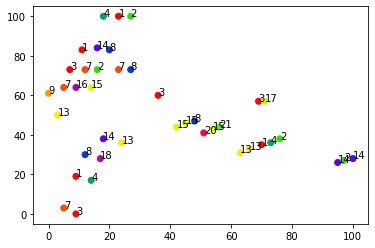

In [41]:
fig, ax = plt.subplots()
ax.scatter(s_df.lat_conv, s_df.long_conv, c = s_df.laneID.astype(int), cmap = plt.get_cmap('prism'))

for i, txt in enumerate(s_df.laneID):
    ax.annotate(txt, (s_df.lat_conv[i],s_df.long_conv[i]))

In [42]:
s_df.laneID.value_counts()

13    4
14    4
15    4
7     4
8     4
1     4
2     4
3     4
4     3
16    1
9     1
18    1
21    1
17    1
20    1
Name: laneID, dtype: int64

In [43]:
[float(x) for x in s_df.laneID]

[13.0,
 14.0,
 13.0,
 14.0,
 13.0,
 14.0,
 13.0,
 14.0,
 15.0,
 15.0,
 15.0,
 15.0,
 7.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 2.0,
 3.0,
 2.0,
 3.0,
 2.0,
 3.0,
 16.0,
 9.0,
 4.0,
 4.0,
 4.0,
 18.0,
 21.0,
 17.0,
 20.0]

In [44]:
len(set(s_df.laneID))

15

In [200]:
xmldict = xml_to_dict('7919015E_BOS211_ITF_COMPLETE.xml')

lanesets = xmldict['topology']['mapData']['intersections']['intersectionGeometry']['laneSet']['genericLane']



df = pd.DataFrame([x for x in lanesets if x['laneAttributes']['sharedWith'] == '0001000000'])

In [205]:
l = list(set(list(set(df.ingressApproach)) + (list(set(df.egressApproach)))))
l.remove(np.NaN)
len(l)

3

In [181]:
coefs = []

for x in lanesets:
    if x['laneAttributes']['sharedWith'] == '0001000000':
        
        try:
            print(x['ingressApproach'])
        except:
            print(x['egressApproach'])
        
        test = []
        for i in (x['nodes']['nodeXY']):
            test.append((float(i['node-LatLon']['lat']),float(i['node-LatLon']['lon'])))
        
        
        coords = np.array(test)
        thing = [coords[0],coords[-1]]
        reg = LinearRegression().fit(np.array(thing)[:,0].reshape(-1,1),np.array(thing)[:,1].reshape(-1,1))
        coefs.append(reg.coef_)

print(coefs)
print()


import math
[math.atan(x) for x in coefs]
    

1
1
1
2
2
3
3
3
1
1
2
3
3
[array([[0.33192956]]), array([[0.2774252]]), array([[0.27858037]]), array([[0.44850236]]), array([[2.03816578]]), array([[-1.82265579]]), array([[-0.67475728]]), array([[-0.64843478]]), array([[0.24204486]]), array([[0.22844037]]), array([[0.25960219]]), array([[-0.47855552]]), array([[-0.46076991]])]



[0.32048662309221637,
 0.2706195028005432,
 0.271691792511585,
 0.4216077936166061,
 1.1146669551694606,
 -1.0689902179903892,
 -0.5935829027666821,
 -0.5752741049326848,
 0.23747757410650833,
 0.22458661059554685,
 0.2539954061203261,
 -0.4463453242351022,
 -0.43177400303064245]

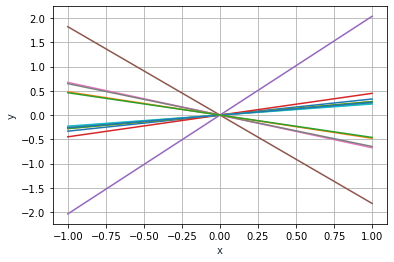

In [170]:
x = np.linspace(-1,1,100)
for count, i in enumerate(coefs):
    
    plt.plot(x, coefs[count][0]*x)
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.grid()
plt.show()

In [171]:
import geopy.distance

div = 10000000

coords_1 = (516841400 , 52933456 )
coords_2 = (516831191, 52938160)

#print(coords_1,coords_2)

#print(geopy.distance.distance(coords_1, coords_2).m)

In [172]:
scale_lat_long(coords_1,coords_2, grid_size = 100)

[(100, 100), (0, 0)]

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
reg = LinearRegression().fit(np.array(coords_1).reshape(-1,1),np.array(coords_2).reshape(-1,1))

In [96]:
reg.coef_

array([[0.99996785]])

In [113]:
reg = LinearRegression().fit(scaled_coords[:,0].reshape(-1,1),scaled_coords[:,1].reshape(-1,1))

In [114]:
reg.coef_

array([[1.09084537]])